<a href="https://colab.research.google.com/github/mirfan57/ML-assignments/blob/main/customer_churn_uniacco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing required libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

Other required libraries will be imported through the document as and when required.

##**Input variables:**
   
#### Bank client data:
- 1. age (numeric)
- 2. job : type of job 
- 3. marital : marital status
- 4. education: Level of education
- 5. default: has credit in default? (binary)
- 6. balance: average yearly balance, in euros (numeric) 
- 7. housing: has housing loan? (binary)
- 8. loan: has personal loan? (binary)

#### related with the last contact of the current campaign:
- 9. contact: contact communication type 
- 10. day: last contact day of the month (numeric)
- 11. month: last contact month of year
- 12. duration: last contact duration, in seconds (numeric)

#### other attributes:
- 13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- 15. previous: number of contacts performed before this campaign and for this client (numeric)
- 16. poutcome: outcome of the previous marketing campaign

### Output variable (desired target):
- 17. y: has the client subscribed a term deposit? (binary: `yes` or `no`)

In [91]:
data = pd.read_csv("/content/drive/MyDrive/bank-marketing-uci/bank.csv", sep=";")

In [92]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


The classification goal is to predict if the client will subscribe a term deposit (variable y).

In [93]:
data.shape

(4521, 17)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [95]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no missing values in our dataset.

In [96]:
data.duplicated().sum()

0

In [97]:
numerical_col = [i for i in data if data[i].dtype != 'O']
categorical_col = [i for i in data if data[i].dtype == 'O']

In [98]:
numerical_col

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [99]:
categorical_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [100]:
for i in categorical_col:
  print(f"There are {data[i].nunique()} categories of {i} which are {data[i].unique()}")

There are 12 categories of job which are ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
There are 3 categories of marital which are ['married' 'single' 'divorced']
There are 4 categories of education which are ['primary' 'secondary' 'tertiary' 'unknown']
There are 2 categories of default which are ['no' 'yes']
There are 2 categories of housing which are ['no' 'yes']
There are 2 categories of loan which are ['no' 'yes']
There are 3 categories of contact which are ['cellular' 'unknown' 'telephone']
There are 12 categories of month which are ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
There are 4 categories of poutcome which are ['unknown' 'failure' 'other' 'success']
There are 2 categories of y which are ['no' 'yes']


In [101]:
for col in categorical_col:
    print(data[col].value_counts(normalize=True) *100)
    print('*********************************************')

management       21.433311
blue-collar      20.924574
technician       16.987392
admin.           10.572882
services          9.223623
retired           5.087370
self-employed     4.047777
entrepreneur      3.715992
unemployed        2.831232
housemaid         2.477328
student           1.857996
unknown           0.840522
Name: job, dtype: float64
*********************************************
married     61.866844
single      26.454324
divorced    11.678832
Name: marital, dtype: float64
*********************************************
secondary    51.006415
tertiary     29.860650
primary      14.996682
unknown       4.136253
Name: education, dtype: float64
*********************************************
no     98.318956
yes     1.681044
Name: default, dtype: float64
*********************************************
yes    56.602522
no     43.397478
Name: housing, dtype: float64
*********************************************
no     84.715771
yes    15.284229
Name: loan, dtype: float64
***********

### Analysis of categorical features

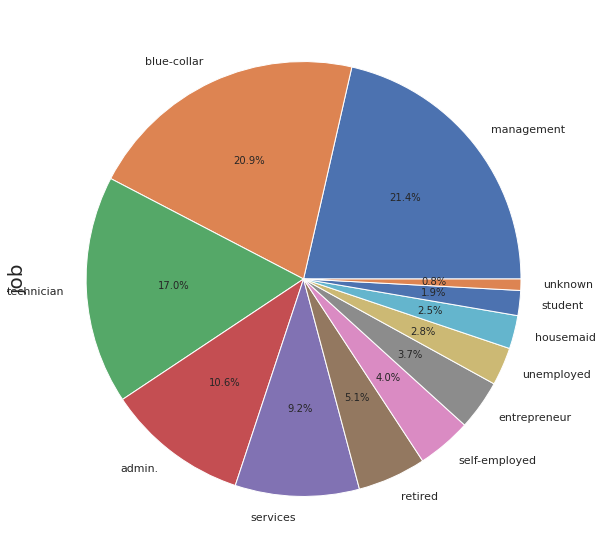

In [102]:
data['job'].value_counts().plot.pie(figsize=(10,10), autopct = '%1.1f%%')

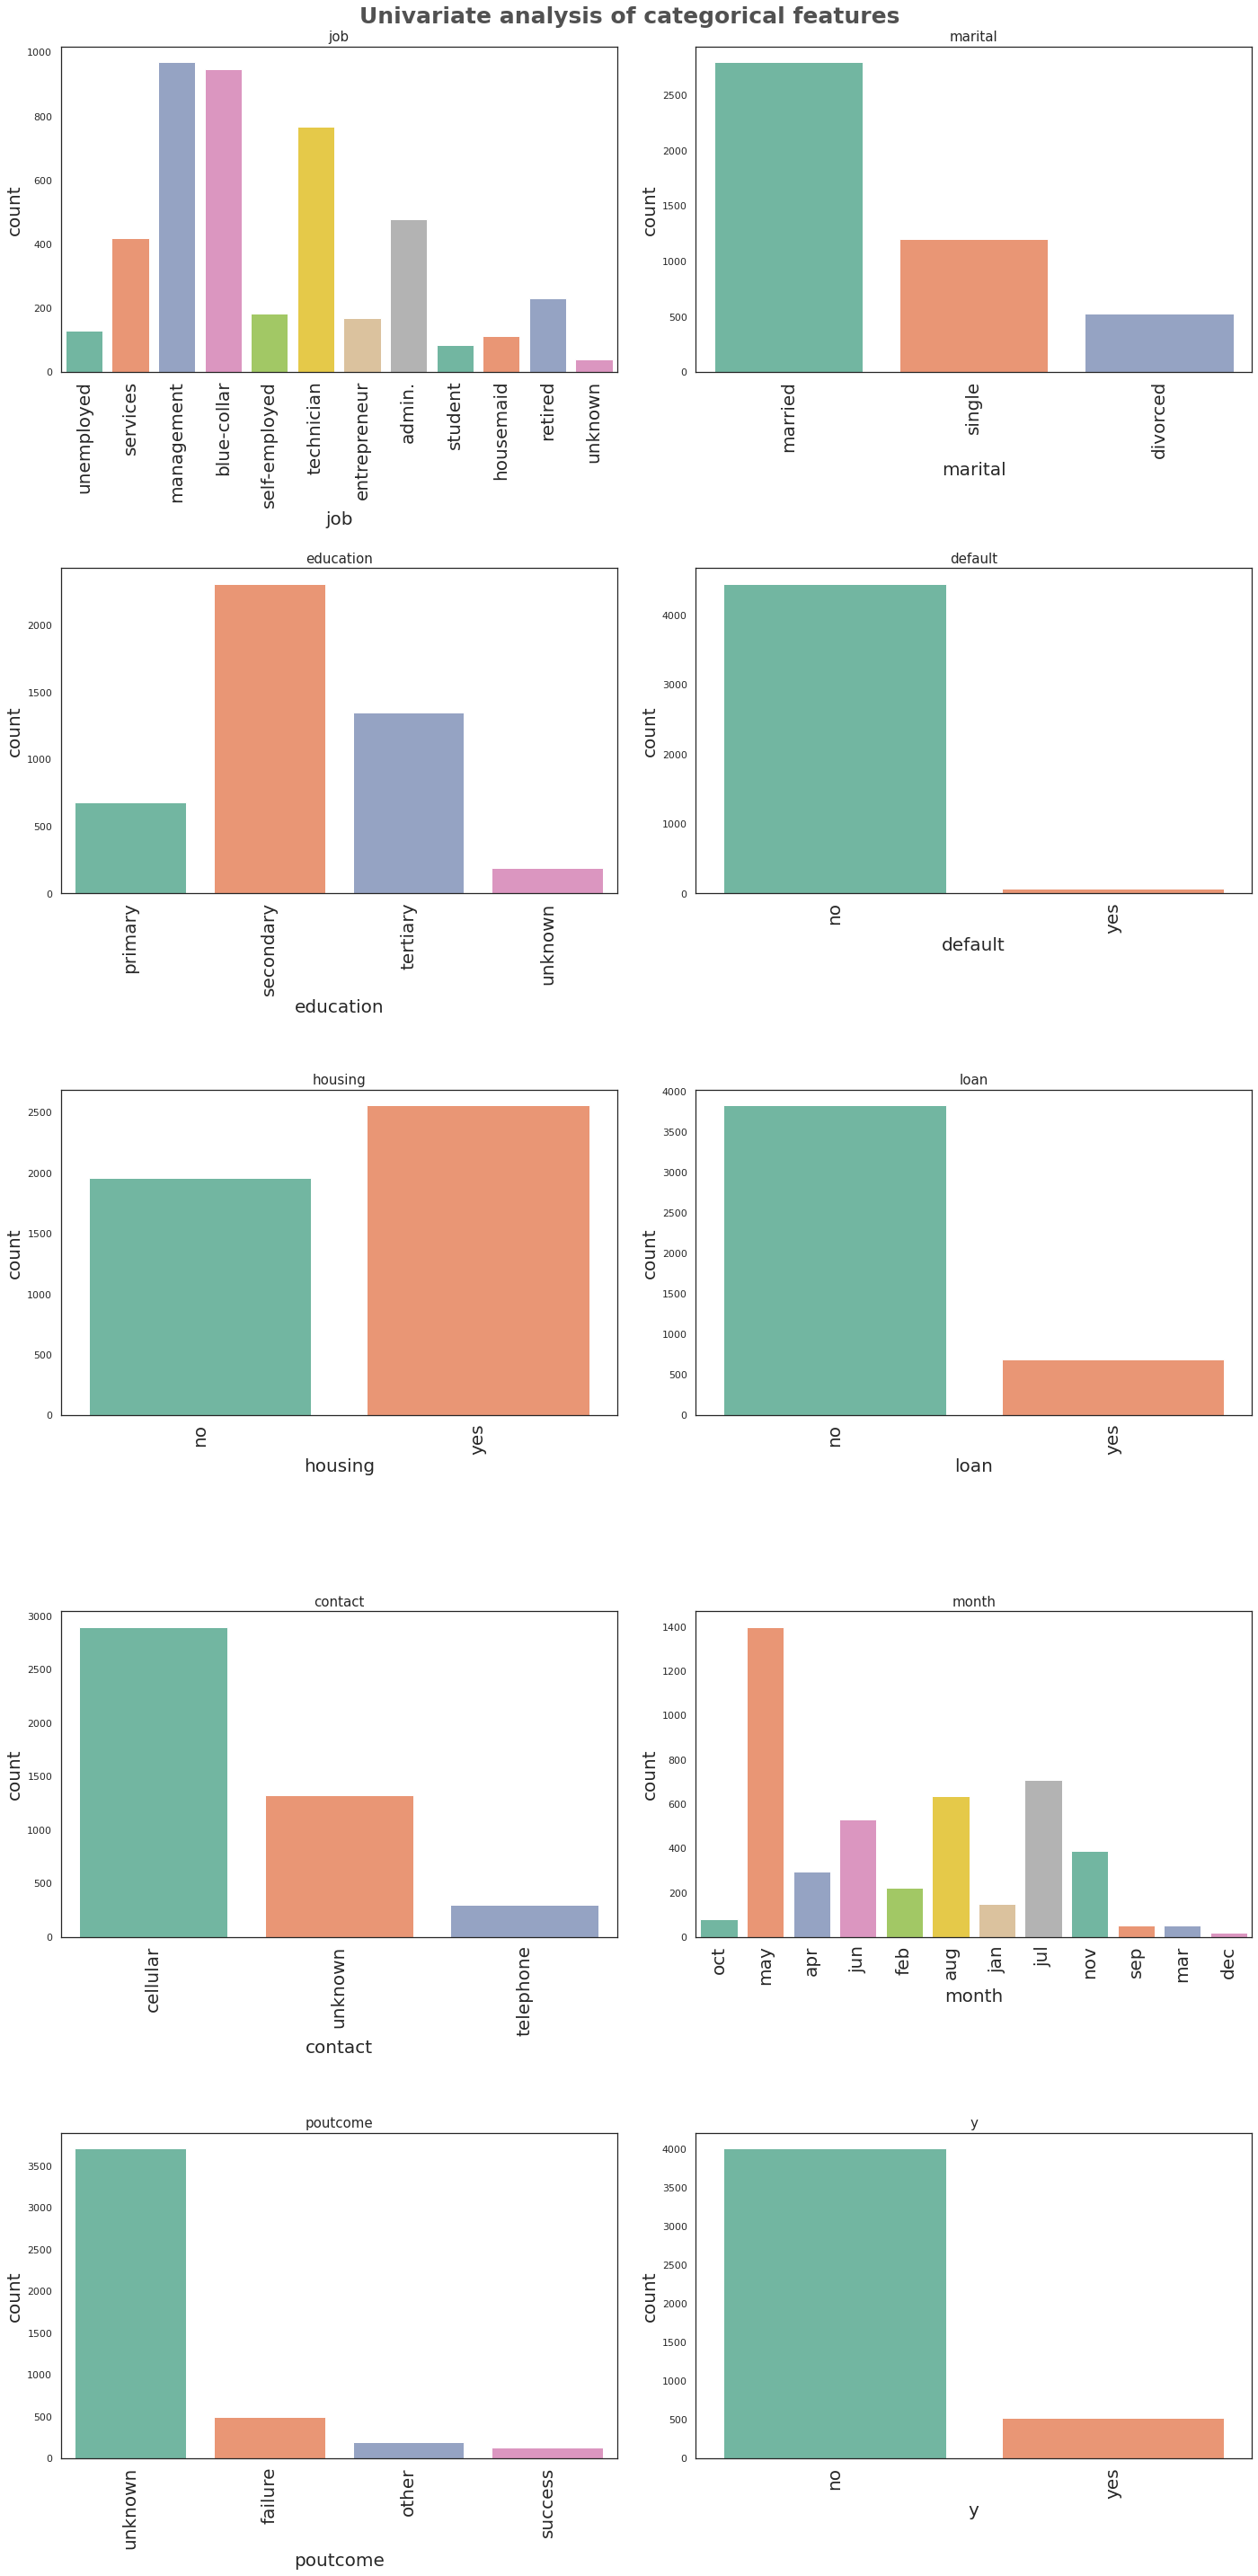

In [103]:
sns.set(rc={'figure.figsize':(20,40),"font.size":25,"axes.titlesize":20,"axes.labelsize":20},style="white")
plt.suptitle("Univariate analysis of categorical features",  fontsize=25, fontweight='bold', alpha=0.8, y=1.)

for i in range(len(categorical_col)):
  plt.subplot(5,2,i+1)
  sns.countplot(data[categorical_col[i]], palette='Set2')
  plt.title(categorical_col[i], fontdict={"fontsize":15})
  plt.xticks(rotation=90, fontsize=20)
  plt.tight_layout()

`default` which is a binary categorical column has highly imbalanced categories with yes having 98.4% of the data.

The feature `poutcome` had ordinal categories but due to presence of almost 82% of unknown data, we could not perform ordinal encoding as it would degrade the prediction capability. 

In [104]:
data['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

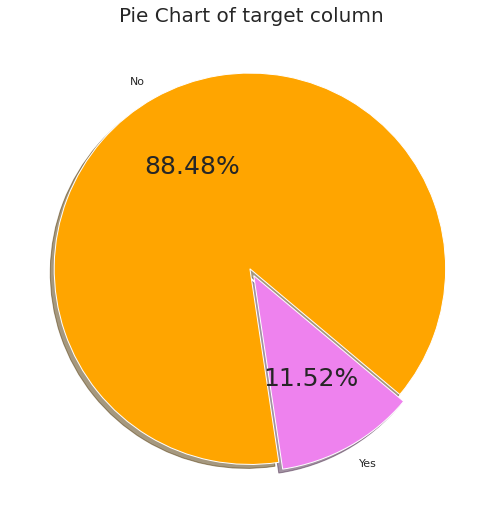

In [105]:
#PieChart
inc_percent = data['y'].value_counts(normalize=True)*100

labels = ["No", "Yes"]
explode = [0.02, 0.02]
colors = ['orange','violet']
plt.figure(figsize =(13, 9))
plt.pie(inc_percent,labels = labels,autopct='%1.2f%%', startangle = -40, explode = explode, shadow = True, colors=colors)  
plt.title ("Pie Chart of target column", fontsize = 20)
plt.show()

In [106]:
def my_barplot(feature, xlabel):
    
    plt.figure(figsize=[14,8])
    df_grp = data.groupby(feature)['y'].value_counts().to_frame().rename(columns={'y': 'Count'}).reset_index()
    ax = sns.barplot(x=feature, y="Count", data=df_grp, palette='Set2', hue='y')
    ax.set(xlabel=xlabel, ylabel='Counts')

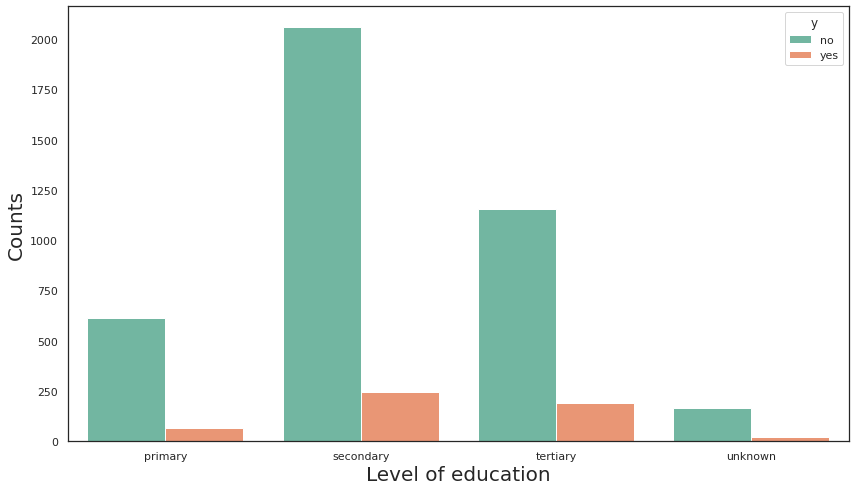

In [107]:
my_barplot('education','Level of education')

### Numerical data distribution

In [108]:
# for feature in data[numerical_col]:
#     sns.kdeplot(data[feature])
#     plt.xlabel(feature)
#     plt.ylabel('Count')
#     plt.show()

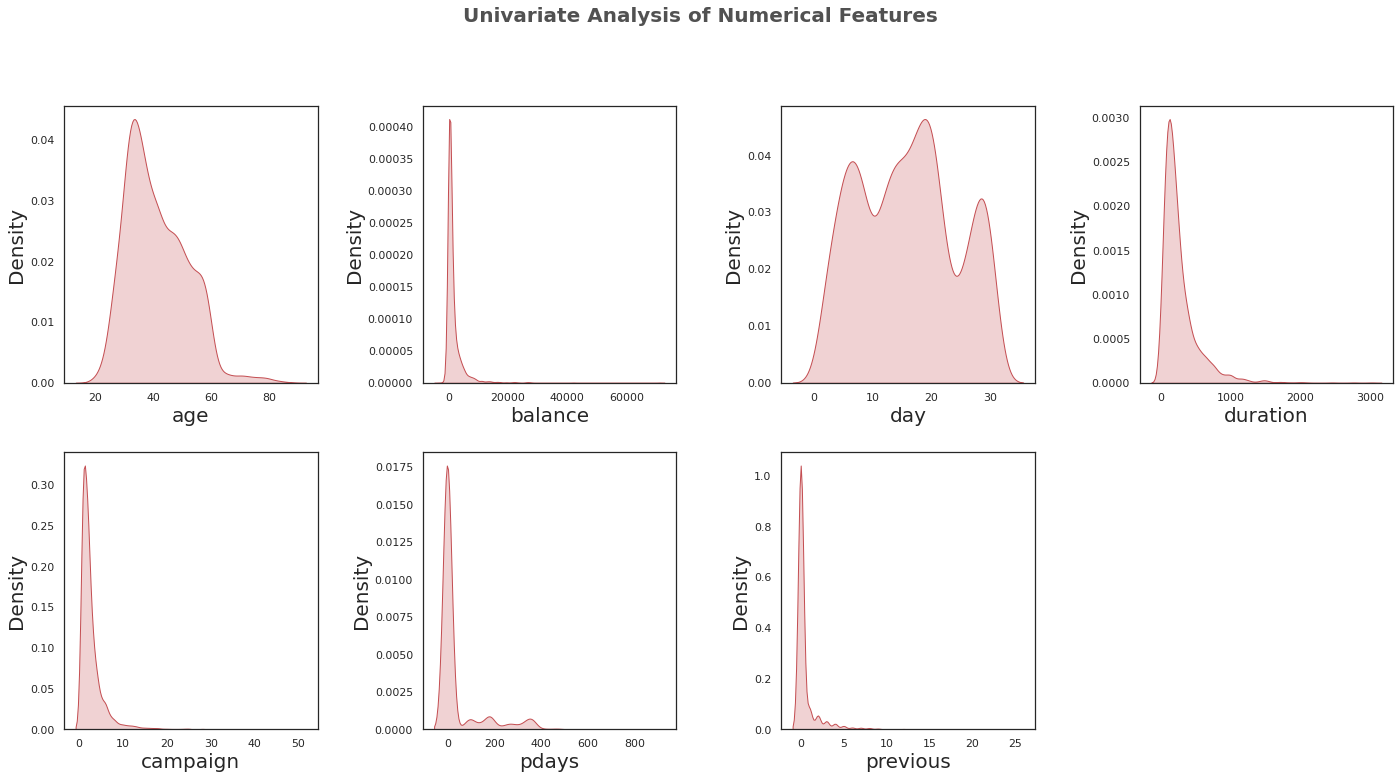

In [109]:
plt.figure(figsize=(20,10))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=20, fontweight = 'bold', alpha=0.8, y=1.1)

ran = len(numerical_col)
#print(ran)
for i in range(ran):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(data[numerical_col[i]], shade=True, color='r')
    plt.xlabel(numerical_col[i])
    plt.tight_layout()

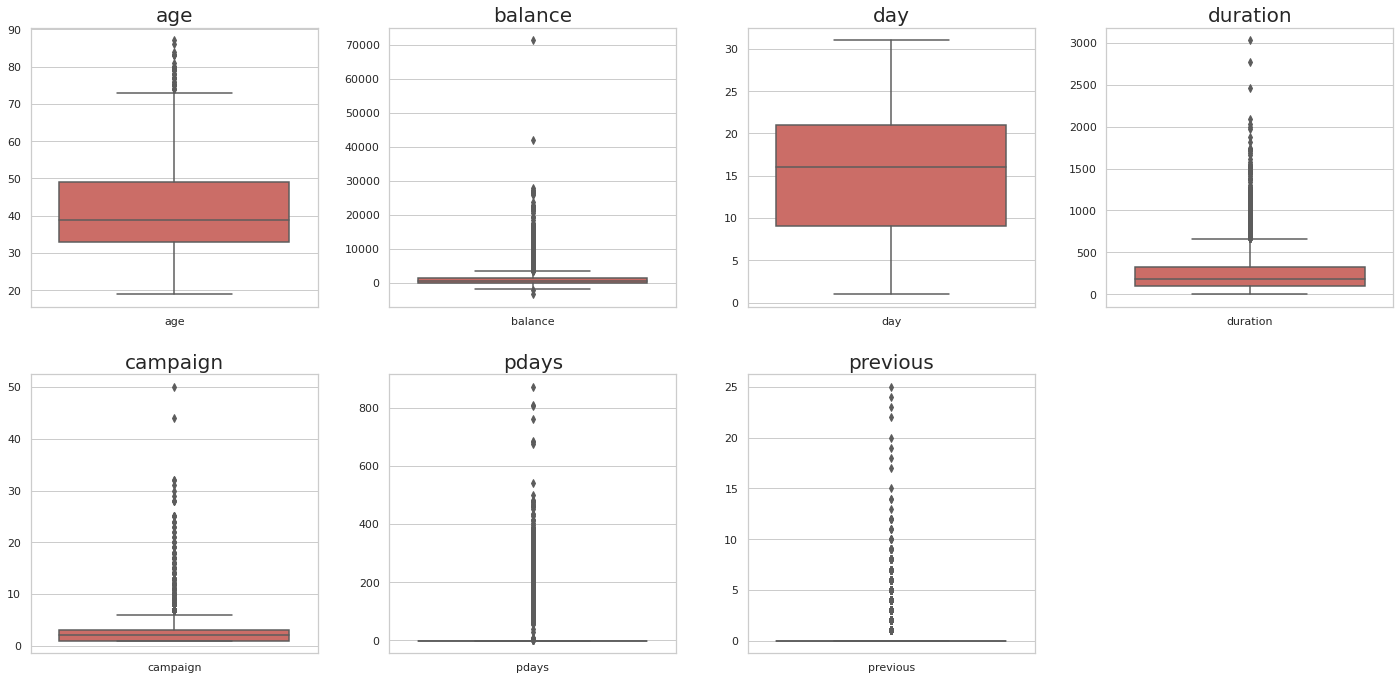

In [110]:
fig= plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
for i in range(len(numerical_col)):
    ax = plt.subplot(2,4,i+1)
    sns.boxplot(data=data[[numerical_col[i]]], orient='v', palette='hls')
    plt.title(numerical_col[i])
    plt.tight_layout()

In [111]:
data['duration'].value_counts()

123     27
104     25
119     23
77      22
58      22
        ..
762      1
602      1
923      1
1032     1
660      1
Name: duration, Length: 875, dtype: int64

In [112]:
data['balance'].max(), data['balance'].min()

(71188, -3313)

In [113]:
data['pdays'].value_counts()

-1      3705
 182      23
 183      20
 363      12
 92       12
        ... 
 118       1
 386       1
 63        1
 81        1
 234       1
Name: pdays, Length: 292, dtype: int64

Columns `balance`, `duration`, `campaign`, `pdays` and `previous` have large number of outliers present as they majorly belong to one region of the population. The column `balance` has very large range in such limited dataset, so there are bound to be outliers in such cases. The data is not a good representative of the entire population.

### Bivariate analsis of numerical continuous variables

Analysis of two variables to determine the empirical relationship between them. Here we examine the relation between the various categorical columns and the target column i.e., y.

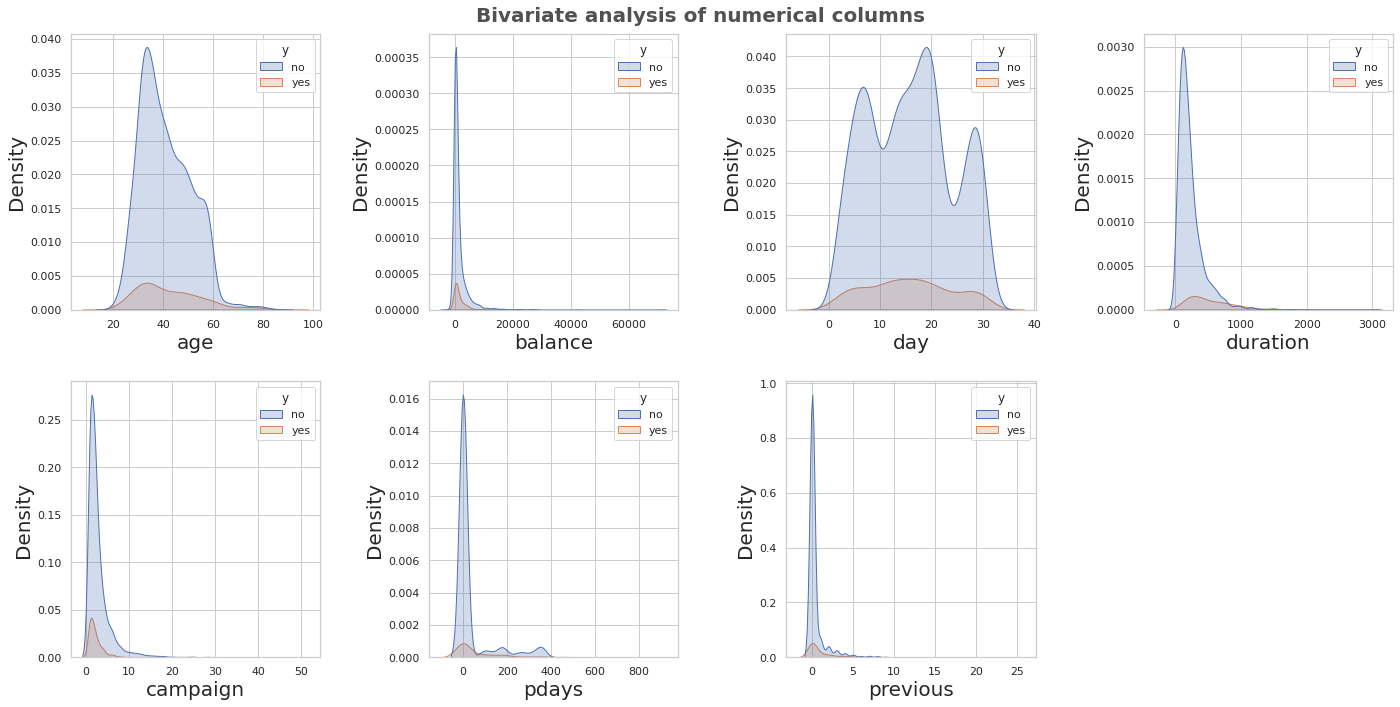

In [114]:
plt.figure(figsize=(20,10))
plt.suptitle("Bivariate analysis of numerical columns", fontweight='bold', fontsize = 20, alpha=0.8, y=1.)

for i in range(len(numerical_col)):
    plt.subplot(2,4,i+1)
    sns.kdeplot(x=numerical_col[i], data=data, shade=True, hue='y')
    plt.xlabel(numerical_col[i])
    plt.tight_layout()

In [115]:
data['poutcome'].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [116]:
data['month'].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [117]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [118]:
# making a copy of our dataframe so that it doesn't change the original data
data1 = data.copy()

In [119]:
# As the original data from which this data is sampled is collected from May 2008 to Nov 2010 i.e, non-leap year having 28 days in Feb

# We will find the day count for starting of each month and map that in our original month column to get numerical data
map_month = {'jan':0, 'feb':31, 'mar':59, 'apr':90, 'may':120, 'jun':151, 'jul':181, 'aug':212, 'sep':243, 'oct':273, 'nov':304, 'dec':334}
data1['month'] = data1['month'].map(lambda x: map_month[x])

# we will combine day with total days till previous month to get the particular day of the year
data1['day_of_year'] = data1['day'] + data1['month']
data1.drop(['month','day'], axis=1, inplace=True)

In [120]:
data1.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,day_of_year
0,30,unemployed,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no,292
1,33,services,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no,131
2,35,management,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no,106
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no,154
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no,125


**It is usually better to split the data into train and test set before encoding the feature columns to avoid data leakage.**

In [121]:
X = data1.drop(columns=['y'])
y = data1.y

In [122]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,day_of_year
0,30,unemployed,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,292
1,33,services,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,131
2,35,management,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,106
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,154
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,125


In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Feature Engineering**

Feature Transformation which comprises of feature scaling and encoding categorical data.

Most of our categorical columns have nominal data except column `"education"` which is ordinal.

In [124]:
#y_train

For nominal data we use one-hot encoding (OHE) and drop the first column to avoid the dummy variable trap as we cannot have a mathematical relationship or correlation between any of our input columns (features).
Label encoding is explicitly used only for the categorical output or target column.

Count encoding can reduce the curse of dimensionality (ie learning in high-dimensional manifolds) which is known to reduce preformance, unlike Label encoding.

In [125]:
data1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y', 'day_of_year'],
      dtype='object')

In [126]:
categorical_col.remove('month')
categorical_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome',
 'y']

ordinal encoder --> education

count encoder --> job, poutcome 

ohe-hot encoder --> marital,default, housing, loan, contact

label encoder --> y

In [127]:
!pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [128]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,day_of_year
978,34,entrepreneur,divorced,tertiary,no,262,no,no,cellular,371,1,-1,0,unknown,324
251,32,management,married,tertiary,no,2349,no,no,cellular,134,5,-1,0,unknown,226
3139,34,technician,single,secondary,no,1076,no,no,cellular,70,2,-1,0,unknown,220
1822,31,management,married,tertiary,no,156,no,no,cellular,657,7,-1,0,unknown,225
4445,46,blue-collar,married,primary,no,258,yes,no,unknown,217,1,-1,0,unknown,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,41,admin.,married,tertiary,no,1536,no,no,cellular,54,2,-1,0,unknown,124
466,34,self-employed,married,secondary,no,-370,yes,no,unknown,748,1,-1,0,unknown,141
3092,46,management,married,tertiary,no,523,yes,no,cellular,105,4,366,2,failure,126
3772,47,management,single,tertiary,no,440,no,no,cellular,71,4,-1,0,unknown,233


In [129]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from category_encoders.count import CountEncoder
from sklearn.compose import ColumnTransformer

In [130]:
labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(y_train)
y_test = labelencoder.transform(y_test)

In [131]:
transformer = ColumnTransformer(transformers=[
    ('tr1', OrdinalEncoder(categories=[['unknown', 'primary', 'secondary', 'tertiary']]), ['education']),
    ('tr2', CountEncoder(), ['job','poutcome']),
    ('tr3', OneHotEncoder(sparse=False, drop="first", dtype=np.int32),['marital','default','housing','loan','contact'])
], remainder='passthrough')

In [132]:
X_train_transformed = pd.DataFrame(transformer.fit_transform(X_train))
X_test_transformed = pd.DataFrame(transformer.transform(X_test))

In [133]:
X_train_transformed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,3.0,127.0,2964.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,262.0,371.0,1.0,-1.0,0.0,324.0
1,3.0,773.0,2964.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,2349.0,134.0,5.0,-1.0,0.0,226.0
2,2.0,625.0,2964.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,34.0,1076.0,70.0,2.0,-1.0,0.0,220.0
3,3.0,773.0,2964.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,156.0,657.0,7.0,-1.0,0.0,225.0
4,1.0,757.0,2964.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,46.0,258.0,217.0,1.0,-1.0,0.0,147.0


We drop drop columns: 3(marital_divorced), 7(default_yes), 8(housing_no), 11(loan_yes) and 13(contact_telephone).

In [134]:
# X_train_transformed.drop(columns=[3,7,8,11,13], inplace=True)
# X_test_transformed.drop(columns=[3,7,8,11,13], inplace=True)

In [135]:
X_train_transformed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,3.0,127.0,2964.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,262.0,371.0,1.0,-1.0,0.0,324.0
1,3.0,773.0,2964.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,2349.0,134.0,5.0,-1.0,0.0,226.0
2,2.0,625.0,2964.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,34.0,1076.0,70.0,2.0,-1.0,0.0,220.0
3,3.0,773.0,2964.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,156.0,657.0,7.0,-1.0,0.0,225.0
4,1.0,757.0,2964.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,46.0,258.0,217.0,1.0,-1.0,0.0,147.0


In [136]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,day_of_year
978,34,entrepreneur,divorced,tertiary,no,262,no,no,cellular,371,1,-1,0,unknown,324
251,32,management,married,tertiary,no,2349,no,no,cellular,134,5,-1,0,unknown,226
3139,34,technician,single,secondary,no,1076,no,no,cellular,70,2,-1,0,unknown,220
1822,31,management,married,tertiary,no,156,no,no,cellular,657,7,-1,0,unknown,225
4445,46,blue-collar,married,primary,no,258,yes,no,unknown,217,1,-1,0,unknown,147


In [137]:
X_train_transformed.columns = ['education','job','poutcome','marital_married','marital_single','default_yes','housing_yes','loan_yes',
                               'contact_telephone', 'contact_unknown','age','balance','duration','campaign','pdays','previous','day_of_year']
X_test_transformed.columns = X_train_transformed.columns
X_train_transformed.head()

,education,job,poutcome,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,age,balance,duration,campaign,pdays,previous,day_of_year
0,3.0,127.0,2964.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,262.0,371.0,1.0,-1.0,0.0,324.0
1,3.0,773.0,2964.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,2349.0,134.0,5.0,-1.0,0.0,226.0
2,2.0,625.0,2964.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,34.0,1076.0,70.0,2.0,-1.0,0.0,220.0
3,3.0,773.0,2964.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,156.0,657.0,7.0,-1.0,0.0,225.0
4,1.0,757.0,2964.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,46.0,258.0,217.0,1.0,-1.0,0.0,147.0


In [138]:
X_test_transformed.head()

,education,job,poutcome,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,age,balance,duration,campaign,pdays,previous,day_of_year
0,2.0,127.0,2964.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,51.0,-2082.0,123.0,6.0,-1.0,0.0,209.0
1,3.0,773.0,158.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,2881.0,510.0,2.0,2.0,5.0,217.0
2,2.0,625.0,2964.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,1412.0,131.0,3.0,-1.0,0.0,218.0
3,3.0,773.0,2964.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,37.0,0.0,247.0,13.0,-1.0,0.0,154.0
4,2.0,361.0,2964.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,31.0,757.0,343.0,2.0,-1.0,0.0,34.0


### Handling imbalanced dataset

There are various techniques to handle imbalanced data
- No sampling i.e. using the original dataset.
- Undersampling/Downsampling the majority class
- Oversampling/Upsampling the minority class
- SMOTE: Synthetic Minority Oversampling Technique

We generally prefer oversampling over undersampling as it is more efficient and we are loosing data in case of undersampliing.
SMOTETomek is a hybrid method which uses an undersampling method (Tomek) with a oversampling method (SMOTE).

**For an imbalanced dataset, first `SMOTE` is applied to create new synthetic minority samples to get a balanced distribution. Further, `Tomek` Links is used in removing the samples close to the boundary of the two classes, to increase the separation between the two classes.**

Handling imbalanced data before splitting into training and testing set is a biased measure of its performance. 

In [139]:
from imblearn.combine import SMOTETomek
from collections import Counter

smk = SMOTETomek(random_state=42)
X_train_balanced, y_train_balanced = smk.fit_resample(X_train_transformed, y_train)

print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_train_balanced))

Original dataset shape Counter({0: 3193, 1: 423})
Resampled dataset shape Counter({0: 3115, 1: 3115})


In [140]:
round(pd.DataFrame(y_train_balanced).value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
dtype: object

In [141]:
X_train_balanced.head()

,education,job,poutcome,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,age,balance,duration,campaign,pdays,previous,day_of_year
0,3.0,127.0,2964.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,262.0,371.0,1.0,-1.0,0.0,324.0
1,3.0,773.0,2964.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,2349.0,134.0,5.0,-1.0,0.0,226.0
2,2.0,625.0,2964.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,34.0,1076.0,70.0,2.0,-1.0,0.0,220.0
3,3.0,773.0,2964.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,156.0,657.0,7.0,-1.0,0.0,225.0
4,1.0,757.0,2964.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,46.0,258.0,217.0,1.0,-1.0,0.0,147.0


### Scaling

In [142]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

scaler = RobustScaler()
#mm_scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
# we will pass the X_test_transformed dataset as we have not changed the test set feature columns using SMOTETomek
X_test_scaled = scaler.transform(X_test_transformed)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train_transformed.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_train_transformed.columns)

In [143]:
X_train_scaled.shape

(6230, 17)

In [144]:
X_train_scaled.head()

,education,job,poutcome,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,age,balance,duration,campaign,pdays,previous,day_of_year
0,1.150978,-1.177305,0.0,-0.897157,0.000000,0.0,-0.427751,0.0,0.0,0.0,-0.377299,-0.182318,0.260215,-0.5,0.0,0.0,1.710420
1,1.150978,0.349882,0.0,0.102843,0.000000,0.0,-0.427751,0.0,0.0,0.0,-0.503066,1.045549,-0.382190,1.5,0.0,0.0,0.663867
2,0.000000,0.000000,0.0,-0.897157,1.372303,0.0,-0.427751,0.0,0.0,0.0,-0.377299,0.296591,-0.555667,0.0,0.0,0.0,0.599792
3,1.150978,0.349882,0.0,0.102843,0.000000,0.0,-0.427751,0.0,0.0,0.0,-0.565949,-0.244682,1.035437,2.5,0.0,0.0,0.653188
4,-1.150978,0.312057,0.0,0.102843,0.000000,0.0,0.572249,0.0,0.0,1.0,0.377299,-0.184672,-0.157213,-0.5,0.0,0.0,-0.179782


In [145]:
X_test_scaled.head()

,education,job,poutcome,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,age,balance,duration,campaign,pdays,previous,day_of_year
0,0.000000,-1.177305,0.000000,0.102843,0.000000,1.0,-0.427751,1.0,0.0,0.0,0.691716,-1.561390,-0.412007,2.0,0.000000,0.0,0.482322
1,1.150978,0.349882,-1.089286,0.102843,0.000000,0.0,-0.427751,0.0,0.0,0.0,0.628832,1.358547,0.636984,0.0,0.032967,5.0,0.567755
2,0.000000,0.000000,0.000000,0.102843,0.000000,0.0,-0.427751,0.0,0.0,0.0,0.628832,0.494274,-0.390322,0.5,0.000000,0.0,0.578434
3,1.150978,0.349882,0.000000,0.102843,0.000000,0.0,0.572249,0.0,0.0,1.0,-0.188650,-0.336464,-0.075896,5.5,0.000000,0.0,-0.105029
4,0.000000,-0.624113,0.000000,-0.897157,1.372303,0.0,-0.427751,0.0,0.0,0.0,-0.565949,0.108911,0.184319,0.0,0.000000,0.0,-1.386522


In [146]:
X_train_scaled.shape, X_test_scaled.shape

((6230, 17), (905, 17))

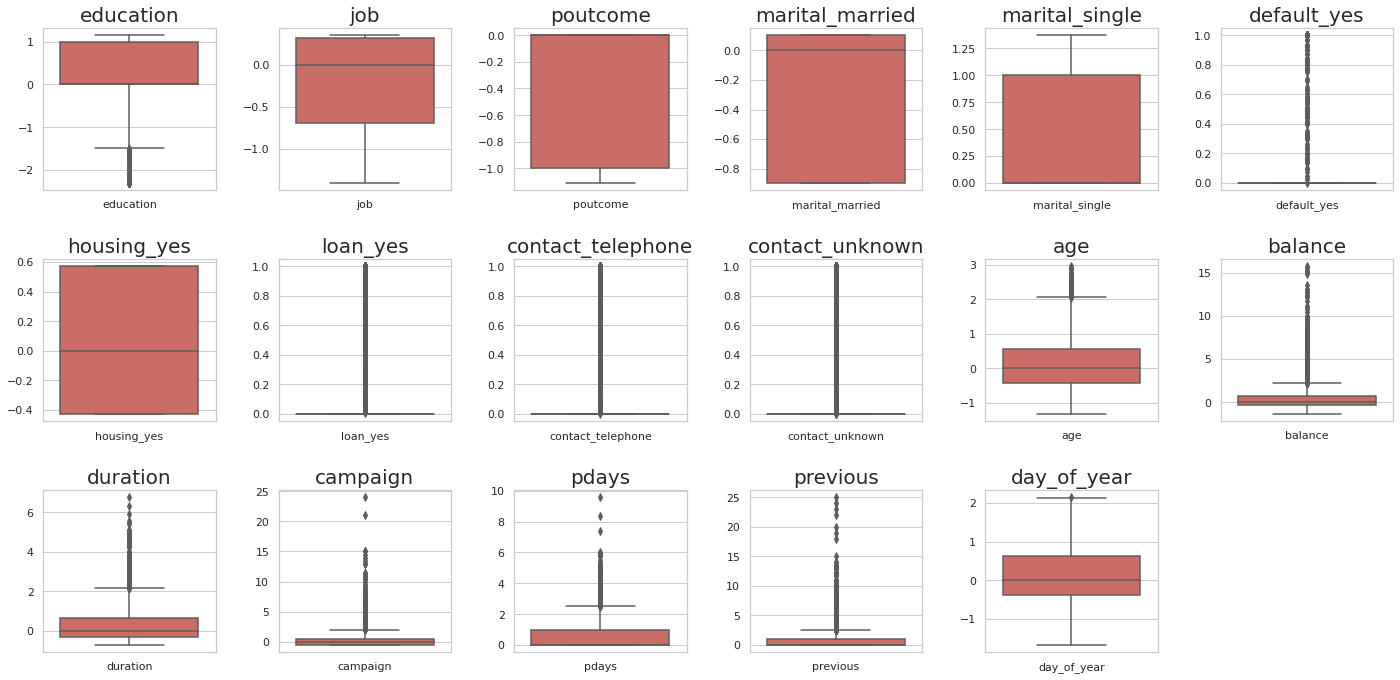

In [147]:
scaled_numerical_col = [i for i in X_train_scaled if X_train_scaled[i].dtype != 'O']

fig= plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
for i in range(len(scaled_numerical_col)):
    ax = plt.subplot(3,6,i+1)
    sns.boxplot(data=X_train_scaled[[scaled_numerical_col[i]]], orient='v', palette='hls')
    plt.title(scaled_numerical_col[i])
    plt.tight_layout()

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

def vif_score(df):
    #scaler = StandardScaler()
    #df_arr = scaler.fit_transform(df)
    df_vif = pd.DataFrame()
    df_vif['Feature'] = df.columns
    df_vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
    #df_vif['VIF'] = [variance_inflation_factor(df_arr,i) for i in range(df_arr.shape[1])]
    return df_vif

In [149]:
vif_score(X_train_scaled)

,Feature,VIF
0,education,1.125567
1,job,1.282326
2,poutcome,6.377214
3,marital_married,3.518785
4,marital_single,3.922075
5,default_yes,1.040530
6,housing_yes,1.246275
7,loan_yes,1.128317
8,contact_telephone,1.215056
9,contact_unknown,1.286963


Usually, VIF scores greater than 5 tells us that the variable is highly correlated. From above table we see that `poutcome` column has a VIF (6.37) greater than 5.

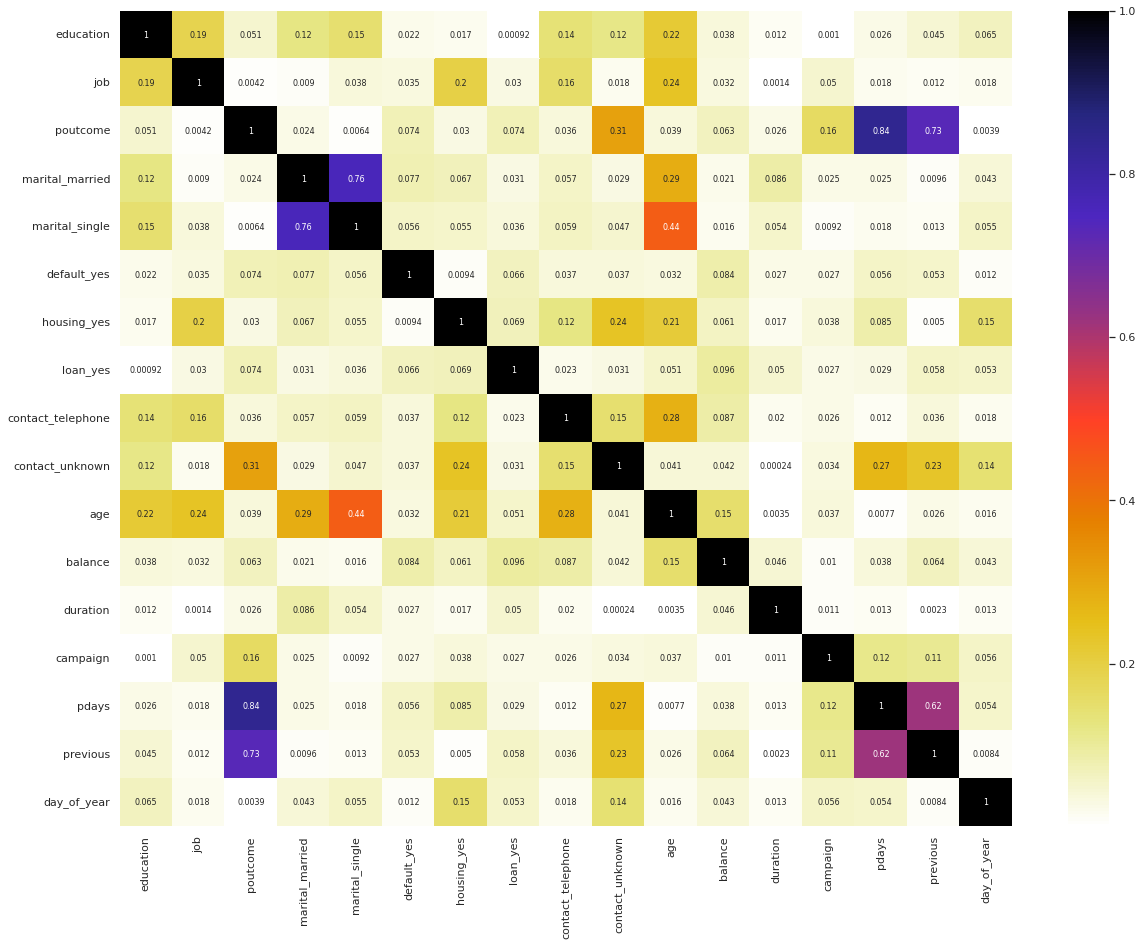

In [150]:
#Using Pearson Correlation
plt.figure(figsize=(20,15))
cor = X_train_scaled.corr().abs()
sns.heatmap(cor, annot=True, annot_kws={"fontsize":8}, cmap=plt.cm.CMRmap_r)
plt.show()

In [151]:
def get_correlated_cols(data, threshold):
  corr_col1 = set()      # creating a set of all unique columns
  corr_col2 = set()
  corr_df = data.corr().abs()          # correlation matrix containing absolute values
  for i in range(len(corr_df.columns)):
    for j in range(i):
      if corr_df.iloc[i,j] > threshold:
      # we can drop either one of the correlated columns, we can use either corr_df.columns[i] or corr_df.columns[j]
        col_name1 = corr_df.columns[j]     # getting the column name
        col_name2 = corr_df.columns[i]
        corr_col1.add(col_name1)
        corr_col2.add(col_name2)
  return corr_col1, corr_col2

In [152]:
# We generally consider the correlation threshold as 0.85
corr_cols = get_correlated_cols(X_train_scaled, 0.85)
corr_cols

(set(), set())

As we can see from the heatmap that there are no correlations greater than or equal to 0.85, so we don't need to drop any columns on the grounds of multi-collinearity. Our independent columns are not strongly correlated to each other and we can move forward without dropping any. We can drop the features based on feature importance as calculated earlier.

## FEATURE SELECTION

### Information Gain

Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

In [153]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train_scaled, y_train_balanced)
mutual_info

array([0.23019609, 0.28476382, 0.08724054, 0.17540622, 0.15964903,
       0.00495518, 0.16969366, 0.07340489, 0.0418072 , 0.11125791,
       0.43251647, 0.07131593, 0.29527024, 0.27805928, 0.06627739,
       0.11893551, 0.39699067])

In [154]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_scaled.columns
imp_order = mutual_info.sort_values(ascending=False)
imp_order

age                  0.432516
day_of_year          0.396991
duration             0.295270
job                  0.284764
campaign             0.278059
education            0.230196
marital_married      0.175406
housing_yes          0.169694
marital_single       0.159649
previous             0.118936
contact_unknown      0.111258
poutcome             0.087241
loan_yes             0.073405
balance              0.071316
pdays                0.066277
contact_telephone    0.041807
default_yes          0.004955
dtype: float64

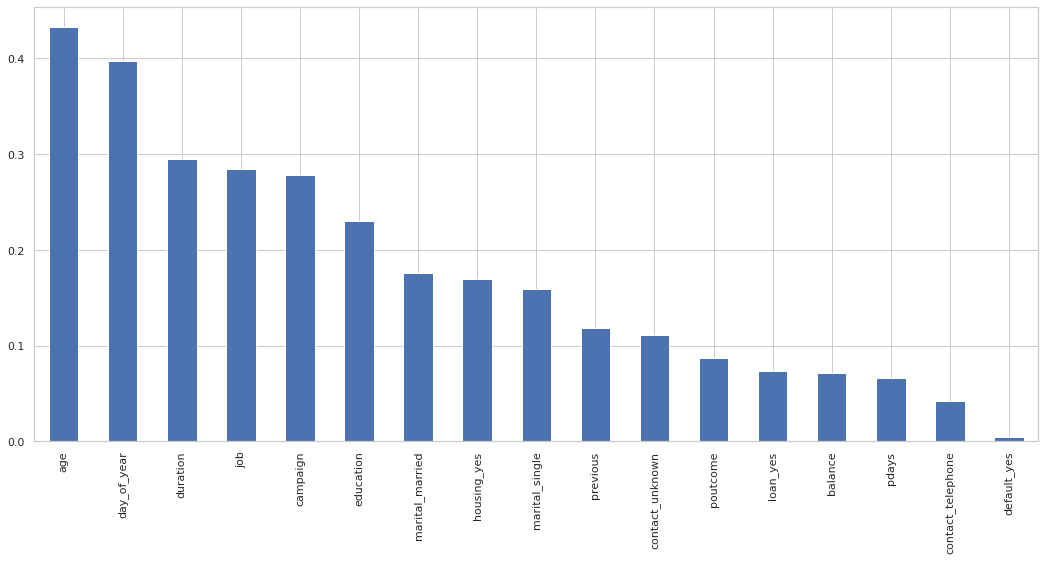

In [155]:
# Plotting the ordered mutual info values per feature
imp_order.plot.bar(figsize=(18,8))

In [156]:
# from sklearn.feature_selection import SelectKBest

# top_ten_ft = SelectKBest(mutual_info_classif, k=10)
# top_ten_ft.fit(X_train_scaled, y_train_balanced)
# # we use get_support() which gives us the indexes of top 10
# top_ten_features = X_train_scaled.columns[top_ten_ft.get_support()]
# top_ten_features

In [157]:
!pip install skfeature-chappers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [158]:
len(y_train_balanced)

6230

Fisher Score for feature selection

In [159]:
# from skfeature.function.similarity_based import fisher_score

# ranks = fisher_score.fisher_score(X_train_scaled.to_numpy(), y_train_balanced)
# print(ranks)

# # Plotting the ranks
# feature_imp = pd.Series(ranks)
# feature_imp.index = X_train_scaled.columns

# feature_imp.plot.barh(figsize=(18,8))

[ 4 14  7  1 10  2  3  9 13 12 16  6 15  0  5  8 11]


In [161]:
# import joblib
# import sys

# sys.modules['sklearn.externals.joblib'] = joblib

In [162]:
# from mlxtend.feature_selection import ExhaustiveFeatureSelector

# from sklearn.ensemble import RandomForestClassifier

# efs = ExhaustiveFeatureSelector(RandomForestClassifier(), min_features=8, max_features=15, scoring='roc_auc', cv=2)
# efs = efs.fit(X_train_scaled, y_train_balanced)
# selected_ftr = X_train_scaled.columns[list(efs.best_idx_)]
# print(selected_ftr)

# print(efs.best_score_)

#### Feature selection using Extra Tree Classifier

In [163]:
from sklearn.ensemble import ExtraTreesClassifier

In [164]:
xtc = ExtraTreesClassifier(random_state=42)

xtc.fit(X_train_scaled, y_train_balanced)
xtree_imp = pd.Series(xtc.feature_importances_, index=X_train_scaled.columns)
xtree_imp.sort_values(ascending=False)

duration             0.215429
housing_yes          0.112880
contact_unknown      0.079317
marital_married      0.073924
poutcome             0.070740
marital_single       0.063105
day_of_year          0.063017
balance              0.047600
education            0.046781
age                  0.044685
job                  0.042427
loan_yes             0.037782
campaign             0.037718
pdays                0.021589
contact_telephone    0.019765
previous             0.018443
default_yes          0.004797
dtype: float64

From above two methods of feature selection, we see that the columns `'default_yes', 'contact_telephone'` have very less importance and can be dropped.

In [165]:
X_train_scaled.drop(columns = ['default_yes','contact_telephone'], inplace=True)
X_test_scaled.drop(columns = ['default_yes','contact_telephone'], inplace=True)

X_train_scaled.head()

,education,job,poutcome,marital_married,marital_single,housing_yes,loan_yes,contact_unknown,age,balance,duration,campaign,pdays,previous,day_of_year
0,1.150978,-1.177305,0.0,-0.897157,0.000000,-0.427751,0.0,0.0,-0.377299,-0.182318,0.260215,-0.5,0.0,0.0,1.710420
1,1.150978,0.349882,0.0,0.102843,0.000000,-0.427751,0.0,0.0,-0.503066,1.045549,-0.382190,1.5,0.0,0.0,0.663867
2,0.000000,0.000000,0.0,-0.897157,1.372303,-0.427751,0.0,0.0,-0.377299,0.296591,-0.555667,0.0,0.0,0.0,0.599792
3,1.150978,0.349882,0.0,0.102843,0.000000,-0.427751,0.0,0.0,-0.565949,-0.244682,1.035437,2.5,0.0,0.0,0.653188
4,-1.150978,0.312057,0.0,0.102843,0.000000,0.572249,0.0,1.0,0.377299,-0.184672,-0.157213,-0.5,0.0,0.0,-0.179782


## MODEL BUILDING

In [166]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, \
                            precision_score, recall_score,f1_score, roc_auc_score, roc_curve, log_loss, matthews_corrcoef

# AUC ROC indicates how well the probabilities from the positive classes are separated from the negative classes

import colorama
from colorama import Fore, Style

In [168]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'K Neighbours Classifier': KNeighborsClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost Classifier' : AdaBoostClassifier(),
    'XG Boost Classifier': XGBClassifier()
}

In [169]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train_balanced)
    
    # making predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # training set performance
    model_train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
    model_train_f1 = f1_score(y_train_balanced, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train_balanced, y_train_pred)
    model_train_recall = recall_score(y_train_balanced, y_train_pred)
    model_train_roc_auc = roc_auc_score(y_train_balanced, y_train_pred) 
    model_train_log_loss = log_loss(y_train_balanced, y_train_pred)
    model_train_mcc = matthews_corrcoef(y_train_balanced, y_train_pred)
    
    # test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_roc_auc = roc_auc_score(y_test, y_test_pred)
    model_test_log_loss = log_loss(y_test, y_test_pred)
    model_test_mcc = matthews_corrcoef(y_test, y_test_pred)
    report = classification_report(y_test, y_test_pred)
    
    BOLD = '\033[1m'
    END = '\033[0m'

    print(Fore.BLUE +'{}{}{}'.format(BOLD, list(models.keys())[i], END))

    #print(list(models.keys())[i])
    
    print("Model performance for training set")
    
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 Score: {:.4f}".format(model_train_f1))
    print("- ROC AUC Score: {:.4f}".format(model_train_roc_auc))
    print("- Log Loss: {:.4f}".format(model_train_log_loss))
    print("- Matthews Correlation Coefficient: {:.4f}".format(model_train_mcc))
    
    print("----------------------------------------------------")
    
    print("Model performance for test set")
    
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- {}F1 Score: {:.4f}{}".format(BOLD, model_test_f1, END))
    print("- ROC AUC Score: {:.4f}".format(model_test_roc_auc))
    print("- Log Loss: {:.4f}".format(model_test_log_loss))
    print("- Matthews Correlation Coefficient: {:.4f}".format(model_test_mcc))
    print("- {}Classification Report:{}".format(BOLD, END))
    print(report)
    
    print("="*35)
    print('\n')

Logistic Regression
Model performance for training set
- Accuracy: 0.8091
- Precision: 0.8153
- Recall: 0.7994
- F1 Score: 0.8091
- ROC AUC Score: 0.8091
- Log Loss: 6.5918
- Matthews Correlation Coefficient: 0.6184
----------------------------------------------------
Model performance for test set
- Accuracy: 0.8110
- Precision: 0.3378
- Recall: 0.7755
- F1 Score: 0.8401
- ROC AUC Score: 0.7954
- Log Loss: 6.5262
- Matthews Correlation Coefficient: 0.4248
- Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       807
           1       0.34      0.78      0.47        98

    accuracy                           0.81       905
   macro avg       0.65      0.80      0.68       905
weighted avg       0.90      0.81      0.84       905



Support Vector Classifier
Model performance for training set
- Accuracy: 0.8836
- Precision: 0.8652
- Recall: 0.9088
- F1 Score: 0.8836
- ROC AUC Score: 0.8836
- Log Loss: 4.0194
- Matt

Gradient boost, AdaBoost and XGBoost classifiers have comparatively high F1 scores, we can further fine tune them to improve our model performance.

## HYPER PARAMETER TUNING

### Hyperparameter tuning Gradient Boosting Classifier

In [170]:
# Gradient Boosting 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params = {
    "learning_rate" : np.linspace(0.05,0.5,30),
    "n_estimators" : [70,90,100,120,140,160, 180, 200],
    "min_samples_split": range(2,50,2),
    "min_samples_leaf" : range(1,60,2),
    "max_depth" : np.linspace(10, 80, 30, dtype=int)
}

gbc = GradientBoostingClassifier()
#gbc_cv = GridSearchCV(estimator=gbc, param_grid=params, cv=4, n_jobs=-1, verbose=4)
gbc_cv = RandomizedSearchCV(estimator=gbc, param_distributions=params, cv=10, n_jobs=-1, verbose=3)
gbc_cv.fit(X_train_scaled, y_train_balanced)

pd.DataFrame(gbc_cv.cv_results_)[['param_learning_rate','param_n_estimators','param_min_samples_split','param_min_samples_leaf',
                                   'param_max_depth','mean_test_score']]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,param_learning_rate,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,mean_test_score
0,0.127586,180,18,15,53,0.940931
1,0.344828,70,16,29,55,0.938202
2,0.32931,200,14,3,72,0.943499
3,0.05,180,10,31,65,0.938042
4,0.05,140,48,3,43,0.939005
5,0.375862,180,22,33,34,0.941091
6,0.437931,200,24,47,38,0.939326
7,0.391379,70,24,47,12,0.933868
8,0.453448,70,18,9,10,0.938042
9,0.267241,160,48,23,41,0.940610


In [171]:
gbc_cv.best_score_

0.9434991974317816

In [172]:
gbc_cv.best_params_

{'n_estimators': 200,
 'min_samples_split': 14,
 'min_samples_leaf': 3,
 'max_depth': 72,
 'learning_rate': 0.3293103448275862}

In [173]:
gbc_model = gbc_cv.best_estimator_
print("Train score: {}".format(gbc_model.score(X_train_scaled, y_train_balanced)))
print("Test score: {}".format(gbc_model.score(X_test_scaled, y_test)))

Train score: 1.0
Test score: 0.8928176795580111


In [174]:
X_train_scaled.head()

,education,job,poutcome,marital_married,marital_single,housing_yes,loan_yes,contact_unknown,age,balance,duration,campaign,pdays,previous,day_of_year
0,1.150978,-1.177305,0.0,-0.897157,0.000000,-0.427751,0.0,0.0,-0.377299,-0.182318,0.260215,-0.5,0.0,0.0,1.710420
1,1.150978,0.349882,0.0,0.102843,0.000000,-0.427751,0.0,0.0,-0.503066,1.045549,-0.382190,1.5,0.0,0.0,0.663867
2,0.000000,0.000000,0.0,-0.897157,1.372303,-0.427751,0.0,0.0,-0.377299,0.296591,-0.555667,0.0,0.0,0.0,0.599792
3,1.150978,0.349882,0.0,0.102843,0.000000,-0.427751,0.0,0.0,-0.565949,-0.244682,1.035437,2.5,0.0,0.0,0.653188
4,-1.150978,0.312057,0.0,0.102843,0.000000,0.572249,0.0,1.0,0.377299,-0.184672,-0.157213,-0.5,0.0,0.0,-0.179782


In [175]:
X_test_scaled.head()

,education,job,poutcome,marital_married,marital_single,housing_yes,loan_yes,contact_unknown,age,balance,duration,campaign,pdays,previous,day_of_year
0,0.000000,-1.177305,0.000000,0.102843,0.000000,-0.427751,1.0,0.0,0.691716,-1.561390,-0.412007,2.0,0.000000,0.0,0.482322
1,1.150978,0.349882,-1.089286,0.102843,0.000000,-0.427751,0.0,0.0,0.628832,1.358547,0.636984,0.0,0.032967,5.0,0.567755
2,0.000000,0.000000,0.000000,0.102843,0.000000,-0.427751,0.0,0.0,0.628832,0.494274,-0.390322,0.5,0.000000,0.0,0.578434
3,1.150978,0.349882,0.000000,0.102843,0.000000,0.572249,0.0,1.0,-0.188650,-0.336464,-0.075896,5.5,0.000000,0.0,-0.105029
4,0.000000,-0.624113,0.000000,-0.897157,1.372303,-0.427751,0.0,0.0,-0.565949,0.108911,0.184319,0.0,0.000000,0.0,-1.386522


In [176]:
gbc_pred = gbc_model.predict(X_test_scaled)

gbc_accuracy = accuracy_score(y_test,gbc_pred)
gbc_f1 = f1_score(y_test, gbc_pred)
gbc_precision = precision_score(y_test,gbc_pred)
gbc_recall = recall_score(y_test, gbc_pred)
gbc_roc_auc_score = roc_auc_score(y_test, gbc_pred)
gbc_mcc = matthews_corrcoef(y_test,gbc_pred)

print("Tuned XGBoost Classifier")
print("Accuracy Score value: {:.4f}".format(gbc_accuracy))
print("F1 score: {:.4f}".format(gbc_f1))
print("Precision: {:.4f}".format(gbc_precision))
print("Recall: {:.4f}".format(gbc_recall))
print("ROC AUC score: {:.4f}".format(gbc_roc_auc_score))
print("Matthews Correlation Coefficient: {:.4f}".format(gbc_mcc))

Tuned XGBoost Classifier
Accuracy Score value: 0.8928
F1 score: 0.4868
Precision: 0.5055
Recall: 0.4694
ROC AUC score: 0.7068
Matthews Correlation Coefficient: 0.4274


### Predictions using fine tuned Gradient Boosting Classifier

In [177]:
#gbc_pred.shape
pd.DataFrame({"true":y_test, "predictions":gbc_pred})

,true,predictions
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
900,1,0
901,0,0
902,0,0
903,0,0


### Plotting Confusion Matrix

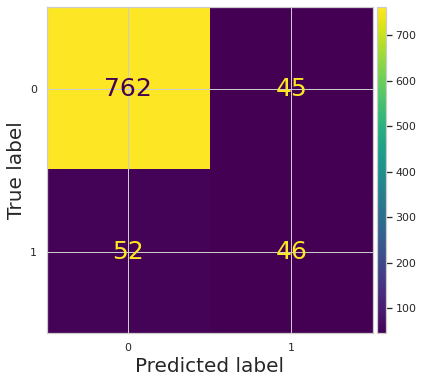

In [178]:
conf_matrix = confusion_matrix(y_test, gbc_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=gbc_model.classes_)
fig, ax = plt.subplots(figsize=(6,6))

#cm = confusion_matrix(np.arange(25), np.arange(25))
#cmp = ConfusionMatrixDisplay(cm, display_labels=np.arange(25))
#fig, ax = plt.subplots(figsize=(10,10))

# Deactivate default colorbar
cm_display.plot(ax=ax, colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)

#plt.tight_layout()

### Hyperparameter tuning XGBoost Classifier

In [179]:
xgb_param = {
    "learning_rate" : np.linspace(0.05,1,100),
    "gamma" : np.linspace(0,0.5,10),
    "max_depth" : np.linspace(2, 150, 30, dtype=int),
    "min_child_weight" : range(1,15,1),
    "colsample_bytree" : [0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9],
    "tree_method" : ["auto","exact","approx","hist"],
    "grow_policy" : ['depthwise', 'lossguide']
}

xgb = XGBClassifier()
xgb_rnd = RandomizedSearchCV(xgb, param_distributions=xgb_param, cv=10, n_iter=10, n_jobs=-1, verbose=3)
xgb_rnd.fit(X_train_scaled, y_train_balanced)
pd.DataFrame(xgb_rnd.cv_results_)[['param_learning_rate','param_gamma','param_max_depth','param_min_child_weight',
                                  'param_colsample_bytree','param_tree_method','param_grow_policy','mean_test_score']]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,param_learning_rate,param_gamma,param_max_depth,param_min_child_weight,param_colsample_bytree,param_tree_method,param_grow_policy,mean_test_score
0,0.433838,0.166667,144,1,0.8,approx,lossguide,0.933066
1,0.222727,0.055556,63,12,0.6,exact,lossguide,0.933066
2,0.069192,0.0,32,5,0.5,exact,depthwise,0.937079
3,0.261111,0.166667,88,5,0.7,exact,depthwise,0.934189
4,0.520202,0.388889,47,10,0.5,hist,lossguide,0.931140
5,0.136364,0.388889,63,1,0.5,exact,depthwise,0.938363
6,0.289899,0.166667,53,10,0.9,hist,depthwise,0.933708
7,0.059596,0.5,42,6,0.7,exact,depthwise,0.934189
8,0.990404,0.444444,22,12,0.2,hist,depthwise,0.925201
9,0.90404,0.388889,27,12,0.5,auto,lossguide,0.927287


In [180]:
xgb_rnd.best_score_

0.9383627608346709

In [181]:
xgb_rnd.best_params_

{'tree_method': 'exact',
 'min_child_weight': 1,
 'max_depth': 63,
 'learning_rate': 0.13636363636363635,
 'grow_policy': 'depthwise',
 'gamma': 0.38888888888888884,
 'colsample_bytree': 0.5}

In [182]:
xgb_model = xgb_rnd.best_estimator_
print("Train score: {}".format(xgb_model.score(X_train_scaled, y_train_balanced)))
print("Test score: {}".format(xgb_model.score(X_test_scaled, y_test)))

Train score: 0.9998394863563402
Test score: 0.9005524861878453


In [183]:
xgb_pred = xgb_model.predict(X_test_scaled)

xgb_accuracy = accuracy_score(y_test,xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test,xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_roc_auc_score = roc_auc_score(y_test, xgb_pred)
xgb_mcc = matthews_corrcoef(y_test,xgb_pred)

print("Tuned XGBoost Classifier")
print("Accuracy Score value: {:.4f}".format(xgb_accuracy))
print("F1 score: {:.4f}".format(xgb_f1))
print("Precision: {:.4f}".format(xgb_precision))
print("Recall: {:.4f}".format(xgb_recall))
print("ROC AUC score: {:.4f}".format(xgb_roc_auc_score))
print("Matthews Correlation Coefficient: {:.4f}".format(xgb_mcc))

Tuned XGBoost Classifier
Accuracy Score value: 0.9006
F1 score: 0.4512
Precision: 0.5606
Recall: 0.3776
ROC AUC score: 0.6708
Matthews Correlation Coefficient: 0.4083


### Predictions using XGBoost classifier

In [184]:
# tuned xgb actual and predicted values
pd.DataFrame({"true":y_test, "predictions":xgb_pred})

,true,predictions
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
900,1,1
901,0,0
902,0,0
903,0,0


### Confusion Matrix for tuned XGBoost Classifier

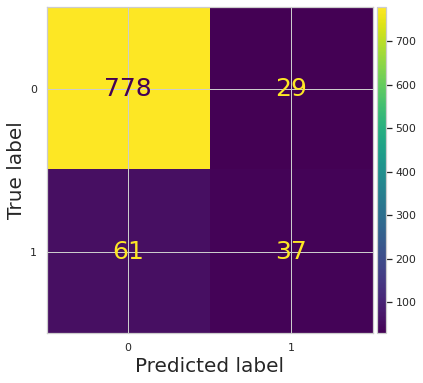

In [185]:
conf_matrix1 = confusion_matrix(y_test, xgb_pred)
cm_display1 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix1, display_labels=xgb_model.classes_)
fig1, ax1 = plt.subplots(figsize=(6,6))

# Deactivate default colorbar
cm_display1.plot(ax=ax1, colorbar=False)

# Adding custom colorbar
cax1 = fig1.add_axes([ax1.get_position().x1+0.01,ax1.get_position().y0,0.02,ax1.get_position().height])
plt.colorbar(cm_display1.im_,  cax=cax1)